## Problem 2 [Variance Reduction Methods for Monte Carlo]
Use a total sample budget of $n=1000$ to obtain Monte Carlo estimates and sample MC estimate variances for the definite integrals in 2 dimensions $(x_1, x_2)$:  
$$
(a)\ exp(\sum _{i=1} ^2 5| x_i - 0.5|)\ \ \ for\ x_i\ in\ [0,1] \\ 
(b)\ cos(\pi + \sum _{i=1} ^2 5x_i)\ \ \ for\ x_i\ in\ [-1,1] \\
(c)\ |4x-2| \times |4y-2|\ \ \ for \ x,y \ in \ [0,1]
$$
Implement stratification and importance sampling (separately) in the Monte Carlo estimation procedures using the same sample budget $n=1000$. Compare the 3 different Monte Carlo integral estimates and their sample variances. Discuss the quality of the Monte Carlo estimates from each method.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
SAMPLE_BUDGET = 1000
SAMPLE_TIME = 100

In [2]:
def rv_gen(my_pdf,maxvalue):
    rv_list = []
    i = 0
    while i < SAMPLE_BUDGET:
        rp = np.array([np.random.rand(),np.random.rand()]).T
        if my_pdf(rp)/maxvalue > np.random.rand():
            i = i + 1
            rv_list.append(rp)
    return rv_list

In [3]:
def rv_gen_2(my_pdf,maxvalue):
    rv_list = []
    i = 0
    while i < SAMPLE_BUDGET:
        rp = np.array([np.random.rand()*2 - 1,np.random.rand()*2 - 1]).T
        if my_pdf(rp)/maxvalue > np.random.rand():
            i = i + 1
            rv_list.append(rp)
    return rv_list

**(a)** Firstly, we calculate the general MC for (a). Next, we use startified and importance sampling separately to reduce the variance. 

In [4]:
def my_func1(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.exp(np.sum(5*np.abs(x - 0.5)))

We run the MC method for 100 times to get the average mean and variance.

In [5]:
a_general_mean_list = []
a_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)
    y = map(lambda t: my_func1(t),x)
    a_general_mean_list.append(np.average(y))
    a_general_var_list.append(np.var(y,ddof = 1))

The general MC result for (a) is

In [6]:
np.average(a_general_mean_list)

19.972359322312212

The sample variance is

In [7]:
np.mean(a_general_var_list)

466.32838471488236

For stratification sampling, we divide the integral area into 2 subinterval as showing below.

<IPython.core.display.Javascript object>


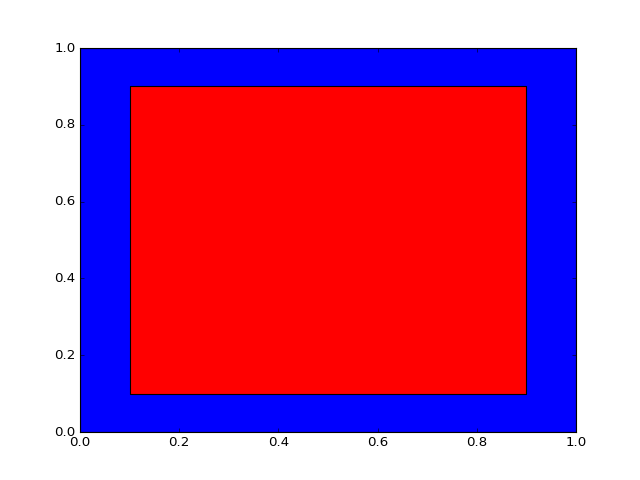

In [8]:
T = 0.4
plt.figure()
plt.fill_between([0,1],[0,0],[1,1],facecolor = 'blue')
plt.fill_between([0.5 - T,0.5 + T],[0.5 - T,0.5 - T],[0.5 + T,0.5 + T],facecolor = 'red')
plt.show()

The following figure shows the random number that we used to sample the function.

<IPython.core.display.Javascript object>


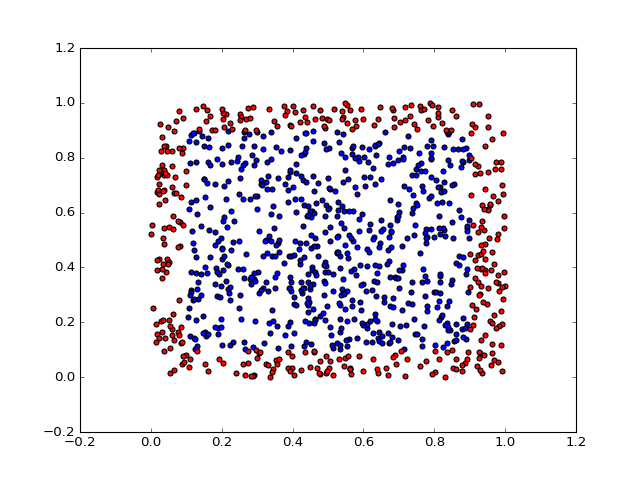

In [9]:
x = np.random.rand(SAMPLE_BUDGET,2)
x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
x1 = x[x1_index]
x2 = x[np.logical_not(x1_index)]
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.hold(True)
plt.scatter(x2[:,0],x2[:,1],c='r')
plt.show()

Calculate the mean and variance in each stratified area. Then, we combine them to get the result for the whole area.

In [10]:
a_strat_mean_list = []
a_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)
        x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func1(t), x1)
        y2 = map(lambda t: my_func1(t), x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        a_strat_mean_list.append(m1*p+m2*(1-p))
        a_strat_var_list.append(v1*p+v2*(1-p))

The result of stratified sampling is

In [11]:
np.average(a_strat_mean_list)

19.939545446804583

The average variance of stratified sampling is 

In [12]:
np.average(a_strat_var_list)

297.10033701335038

We choose  $f_{X_1X_2}(x_1,x_2) = 2 \left| x_1 - 0.5 \right| +2\left| x_2 - 0.5 \right| $  ,  ($x_1,x_2 \in [0,1]$) for the importance sampling of (a). Since it is close to the function in (a).

In [13]:
def my_pdf1(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.sum(np.abs(x-0.5))*2

In [14]:
a_imp_mean_list=[]
a_imp_var_list=[]
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen(my_pdf1,2))
    y = map(lambda t: my_func1(t)/my_pdf1(t),x)
    a_imp_mean_list.append(np.average(y))
    a_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (a) is

In [15]:
np.average(a_imp_mean_list)

20.062193758866098

The sample variance is

In [16]:
np.average(a_imp_var_list)

158.36648364465313

**(b)** Let's work for (b). Firstly, we calculate the general MC result.

In [17]:
def my_func2(x):
    if min(x) < -1 or max(x) > 1:
        return 0
    return np.cos(np.pi+5*np.sum(x))

In [18]:
b_general_mean_list = []
b_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)*2 -1
    y = map(lambda t: my_func2(t)*4,x)
    b_general_mean_list.append(np.average(y)) 
    b_general_var_list.append(np.var(y,ddof = 1))

The general result for (b) is

In [19]:
np.average(b_general_mean_list)

-0.1413668464824451

The sample variance is

In [20]:
np.average(b_general_var_list)

8.0140630861041782

For stratified sampling, we divide the area in to 2 subarea. The first area is where the function greater than 0. The rest will be the second area.

<IPython.core.display.Javascript object>


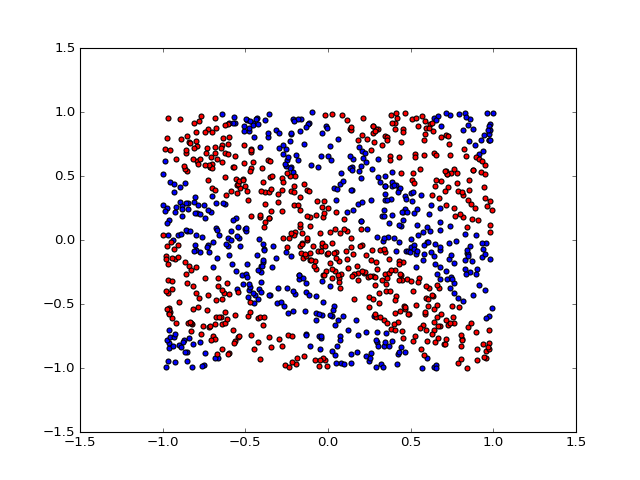

In [21]:
x = np.random.rand(SAMPLE_BUDGET,2)*2 - 1
x1_index = np.array(map(lambda t: my_func2(t) > 0, x))
x1 = x[x1_index]
x2 = x[np.logical_not(x1_index)]
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.hold(True)
plt.scatter(x2[:,0],x2[:,1],c='r')
plt.show()

In [22]:
b_strat_mean_list = []
b_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)*2 - 1
        x1_index = np.array(map(lambda t: my_func2(t) > 0, x))
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func2(t)*4, x1)
        y2 = map(lambda t: my_func2(t)*4, x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        
        b_strat_mean_list.append(m1*p+m2*(1-p))
        b_strat_var_list.append(v1*p+v2*(1-p))

The stratified sampling MC result for (b) is 

In [23]:
np.mean(b_strat_mean_list)

-0.13472716014905306

The variance of the stratified sampling is

In [24]:
np.mean(b_strat_var_list)

1.5191444564158161

Because this function varies between postive and negative, it is hard to find a good pdf that is approximately proportional to it. So we can transform the original problem to an equivalent one. Firstly, we calculate the integral of the following function.
$$
1 + cos(\pi + \sum _{i=1} ^2 5x_i)\ \ \ for\ x_i\ in\ [-1,1]
$$
Next, we subtract 4 from the result to get the original integral. Since the integral of $1$ over $[-1,1]$ is $4$.

In [25]:
def my_func2_2(x):
    if min(x) < -1 or max(x) > 1:
        return 0
    return 1 + np.cos(np.pi+5*np.sum(x))

However, this function is still hard to find an approximate pdf. The best pdf is proportional to the function itself. We choose a quantizatized one of the function as our pdf. 

In [26]:
NS = 20
xs = np.arange(-2 + 2.0/NS, 2, 4.0/NS)
ys = np.r_[map(lambda t: my_func2_2(np.r_[t/2.0,t/2.0].T),xs)]
ys = np.abs(ys)
NORMAL_FACTOR = sum(2*ys*(4.0 - 4.0/NS - 8.0/NS*np.r_[(NS/2-1):0:-1,0,0:(NS/2)])/NS)
MAX_VALUE = max(ys)

In [27]:
def my_pdf2(x):
    if min(x) <= -1 or max(x) >= 1:
        return 0
    return ys[int(np.floor(sum(x)/(4.0/NS))+NS/2)]/NORMAL_FACTOR
    #return 1

<IPython.core.display.Javascript object>


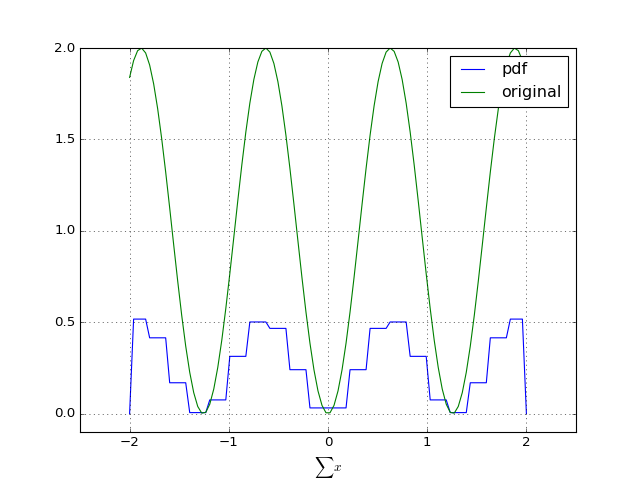

In [28]:
plt.figure()
xp = np.linspace(-2,2,100)
yp = map(lambda t: my_func2_2(np.r_[t/2.0,t/2.0].T),xp)
ysp = map(lambda t: my_pdf2(np.r_[t/2.0,t/2.0].T),xp)
plt.hold(True)
plt.plot(xp,ysp)
plt.plot(xp,np.abs(yp))
plt.axis([-2.5,2.5,-0.1,2])
plt.legend(['pdf','original'])
plt.xlabel('$\sum x$')
plt.grid()
plt.show()

In [29]:
b_imp_mean_list=[]
b_imp_var_list = []
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen_2(my_pdf2,MAX_VALUE))
    y = map(lambda t: my_func2_2(t)/my_pdf2(t), x)
    b_imp_mean_list.append(np.average(y))
    b_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (b) is

In [30]:
np.average(b_imp_mean_list) - 4

-0.14902014017738496

The sample variance is

In [31]:
np.mean(b_imp_var_list)

1.4911465089824976

**(c)** Again, we firstly calculate the general MC.

In [32]:
def my_func3(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.abs(4*x[0] - 2) * np.abs(4*x[1] - 2)

In [33]:
PDF2N = - (9*np.pi**6)/10000 + (259*np.pi**4)/3750 - (112*np.pi**2)/75 + 64.0/7
PDF2MAX = -(((2*7**(0.5)*np.pi**2)/75 - (2*np.pi**2)/15)*((2*7**(0.5)*np.pi**2)/75 + (2*np.pi**2)/75)*((2*7**(0.5)*np.pi**2)/75 + (8*np.pi**2)/75))

def my_pdf2_1(x):
    if min(x) < -1 or max(x) > 1:
        return 0
    s = sum(x)
    #return (s*s - np.pi**2/100)*(s*s - np.pi**2*9/100)*(s*s - 25/100 * np.pi**2)/PDF2N
    return 1
MAX_VALUE = 1

In [34]:
c_general_mean_list = []
c_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)
    y = map(lambda t: my_func3(t),x)
    c_general_mean_list.append(np.average(y)) 
    c_general_var_list.append(np.var(y,ddof = 1))

The general result for (c) is

In [35]:
np.average(c_general_mean_list)

1.0007998601123453

The sample variance is

In [36]:
np.average(c_general_var_list)

0.77575139722885256

We use the same stratifing schedule in **(a)**.

In [37]:
c_strat_mean_list = []
c_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)
        x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func3(t), x1)
        y2 = map(lambda t: my_func3(t), x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        c_strat_mean_list.append(m1*p+m2*(1-p))
        c_strat_var_list.append(v1*p+v2*(1-p))

The stratified sampling result for **(c)** is 

In [38]:
np.mean(c_strat_mean_list)

0.99763951790286565

The variance of (c) for stratified sampling is

In [39]:
np.mean(c_strat_var_list)

0.54310101648507181

We choose $f(x_1,x_2) = 4\left| x_1-0.5 \right| $ for the importance sampling.

In [40]:
def my_pdf3(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return 4 * np.abs(x[0]-0.5)

In [41]:
c_imp_mean_list=[]
c_imp_var_list=[]
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen(my_pdf3,2))
    y = map(lambda t: my_func3(t)/my_pdf3(t),x)
    zx = np.logical_or(x < 0,x > 1)
    zy = np.logical_or(zx[:,0],zx[:,1])
    y = y*np.logical_not(zy)
    c_imp_mean_list.append(np.average(y))
    c_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (c) is

In [42]:
np.average(c_imp_mean_list)

1.0013596121812709

The sample variance is

In [43]:
np.mean(c_imp_var_list)

0.33147887572116125

In [46]:
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('a',np.mean(a_general_mean_list),np.mean(a_strat_mean_list),np.mean(a_imp_mean_list)))
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('b',np.mean(b_general_mean_list),np.mean(b_strat_mean_list),np.mean(b_imp_mean_list)-4))
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('c',np.mean(c_general_mean_list),np.mean(c_strat_mean_list),np.mean(c_imp_mean_list)))

(a) general mean: 19.9724 	 stratified mean: 19.9395 	 importance mean: 20.0622
(b) general mean: -0.1414 	 stratified mean: -0.1347 	 importance mean: -0.1490
(c) general mean: 1.0008 	 stratified mean: 0.9976 	 importance mean: 1.0014


In [45]:
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('a',np.mean(a_general_var_list),np.mean(a_strat_var_list),np.mean(a_imp_var_list)))
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('b',np.mean(b_general_var_list),np.mean(b_strat_var_list),np.mean(b_imp_var_list)))
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('c',np.mean(c_general_var_list),np.mean(c_strat_var_list),np.mean(c_imp_var_list)))

(a) general var: 466.3284 	 stratified var: 297.1003 	 importance var: 158.3665
(b) general var: 8.0141 	 stratified var: 1.5191 	 importance var: 1.4911
(c) general var: 0.7758 	 stratified var: 0.5431 	 importance var: 0.3315


We can see that both method reduce the variance. The importance sampling is better than the stratified sampling in the ability of reducing the variance. However, it is hard to find a pdf for (b) that approximately proportional to the function. In this case, the importance sampling may not as easy as stratified sampling for implementation.